In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import joblib
import time
import pickle

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [3]:
from multioutput_functions import *

In [4]:
singles = pd.read_hdf(r'C:/Users/juand/Research/h5_files/singles_230801.h5')
singles.drop(['OLD_SPT','MKO_J', 'MKO_H', 'MKO_K', '2MASS_J', '2MASS_H', '2MASS_KS','NAME'],axis=1,inplace=True)
singles

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT
0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,M6.0
1,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,M7.0
2,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,M6.0
3,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,M6.0
4,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,M6.0
...,...,...,...,...,...
1044,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0
1045,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.244854443773445e-14, 6.580743947046151e-14,...","[3.029490952427518e-14, 2.968834229762724e-14,...",23.436972,T8.0
1046,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[-2.2614582467991454e-14, 5.872129739165835e-1...","[4.4876320743869606e-14, 4.616998222544605e-14...",13.918951,T8.0
1047,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.4678859815360097e-14, 1.7897430190283215e-1...","[6.009617385156795e-15, 6.170117985714561e-15,...",30.023281,T9.0


In [11]:
singles[('T8.0'==singles.SPT)|('T9.0'==singles.SPT)]

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT
1034,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.992531814725521e-14, 8.153229088137351e-14,...","[2.365739558655487e-14, 2.3023024245102725e-14...",23.753120,T8.0
1035,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[6.107506385195192e-14, 1.308809040886236e-13,...","[5.81827390623825e-14, 5.913330845726249e-14, ...",9.948225,T8.0
1036,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[6.350185402430425e-14, 1.0002727648162379e-13...","[3.885041683543297e-14, 3.834472230720199e-14,...",20.761559,T8.0
1037,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[6.811221695777367e-14, 8.196927776251384e-14,...","[1.323021589294398e-14, 1.3956771006894662e-14...",29.905622,T8.0
1038,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.720483464918519e-14, 6.798997350033901e-15,...","[3.916795900837194e-14, 3.836322205560747e-14,...",13.850032,T8.0
1039,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.619817405038807e-14, 2.80845933647059e-14, ...","[4.58722361975544e-14, 4.5880915710515514e-14,...",18.503080,T8.0
1041,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[4.831420185383553e-14, 7.650502261375031e-14,...","[1.7085210724748287e-14, 1.6370495201874362e-1...",38.312576,T8.0
1042,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[4.7812050580485913e-14, 5.542202826731689e-14...","[4.3772840812928905e-14, 4.172118298185513e-14...",13.148890,T8.0
1043,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.706412320424679e-14, 6.531266565215406e-14,...","[7.039858415177444e-15, 6.42097676449262e-15, ...",67.750084,T8.0
1044,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0


(array([ 1.,  1.,  1.,  6.,  7., 11., 15., 23., 25., 25., 37., 35., 24.,
        32., 25., 25., 29., 17., 21., 26., 30., 21., 27., 24., 22., 15.,
        17., 23., 20., 16.]),
 array([5.83613848e-18, 3.33090998e+00, 6.66181997e+00, 9.99272995e+00,
        1.33236399e+01, 1.66545499e+01, 1.99854599e+01, 2.33163699e+01,
        2.66472799e+01, 2.99781898e+01, 3.33090998e+01, 3.66400098e+01,
        3.99709198e+01, 4.33018298e+01, 4.66327398e+01, 4.99636497e+01,
        5.32945597e+01, 5.66254697e+01, 5.99563797e+01, 6.32872897e+01,
        6.66181997e+01, 6.99491096e+01, 7.32800196e+01, 7.66109296e+01,
        7.99418396e+01, 8.32727496e+01, 8.66036596e+01, 8.99345695e+01,
        9.32654795e+01, 9.65963895e+01, 9.99272995e+01]),
 <BarContainer object of 30 artists>)

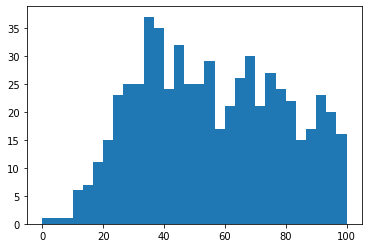

In [5]:
plt.hist(singles.J_SNR[singles.J_SNR<100],bins=30)

In [6]:
wave = singles['WAVE'][0]
wavegrid_list=list(wave)
wave = np.array(wave)
wavegrid=wave

In [7]:
# df = pd.read_hdf(r'C:/Users/juand/Research/h5_files/standards_230801.h5').reset_index(drop=True)
# STANDARDS = {
#     "WAVE": df["WAVE"].iloc[0],
#     "SPT": df["SPT"],
#     "FLUX": df["FLUX"],
#     "UNC": df["UNCERTAINTY"],
# }

In [8]:
typenum=[]
for i in range(len(singles)):
    typenum.append(typeToNum(singles['SPT'][i]))
singles['SPT_NUM']=typenum
singles = singles.loc[singles['SPT_NUM']>15*np.ones(len(singles))]
singles = singles.reset_index(drop=True)
singles

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT,SPT_NUM
0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,M6.0,16.0
1,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,M7.0,17.0
2,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,M6.0,16.0
3,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,M6.0,16.0
4,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,M6.0,16.0
...,...,...,...,...,...,...
1041,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0,38.0
1042,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.244854443773445e-14, 6.580743947046151e-14,...","[3.029490952427518e-14, 2.968834229762724e-14,...",23.436972,T8.0,38.0
1043,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[-2.2614582467991454e-14, 5.872129739165835e-1...","[4.4876320743869606e-14, 4.616998222544605e-14...",13.918951,T8.0,38.0
1044,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.4678859815360097e-14, 1.7897430190283215e-1...","[6.009617385156795e-15, 6.170117985714561e-15,...",30.023281,T9.0,39.0


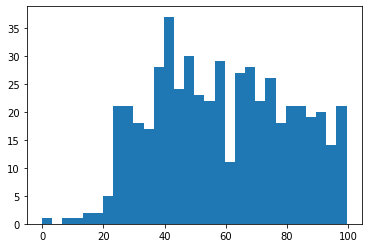

In [9]:
newsnr=[]
for i in range(len(singles)):
    flux=singles['FLUX'][i]
    uncer=singles['UNCERTAINTY'][i]
    newsnr.append(measureSN(wave,flux,uncer))
singles['J_SNR_2']=newsnr
plt.hist(singles.J_SNR_2[singles.J_SNR_2<100],bins=30)
singles.drop(['J_SNR_2'],axis=1,inplace=True)

In [10]:
snrclass=[]
for i in range(len(singles)):
    snrQ = singles['J_SNR'][i]
    if snrQ<50:
        snrclass.append('low')
    elif (snrQ>=50)&(snrQ<100):
        snrclass.append('mid')
    else:
        snrclass.append('hig')
singles['SNR_CLASS']=snrclass

In [11]:
drop_unc = []
for position, uncertainty_i in enumerate(np.array(singles['UNCERTAINTY'])):
    if np.any(uncertainty_i<=0)|np.any(np.isnan(uncertainty_i))|np.any(np.isinf(uncertainty_i)):
        drop_unc.append(position)
singles = singles.drop(drop_unc).reset_index(drop=True)

In [12]:
singles

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT,SPT_NUM,SNR_CLASS
0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,M6.0,16.0,mid
1,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,M7.0,17.0,hig
2,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,M6.0,16.0,hig
3,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,M6.0,16.0,mid
4,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,M6.0,16.0,hig
...,...,...,...,...,...,...,...
1018,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0,38.0,low
1019,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.244854443773445e-14, 6.580743947046151e-14,...","[3.029490952427518e-14, 2.968834229762724e-14,...",23.436972,T8.0,38.0,low
1020,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[-2.2614582467991454e-14, 5.872129739165835e-1...","[4.4876320743869606e-14, 4.616998222544605e-14...",13.918951,T8.0,38.0,low
1021,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.4678859815360097e-14, 1.7897430190283215e-1...","[6.009617385156795e-15, 6.170117985714561e-15,...",30.023281,T9.0,39.0,low


In [13]:
start = time.time()
flux_cols_dic = {}
for j in range(len(singles['FLUX'][0])):
    fluxcol=[]
    for i in range(len(singles)):
        fluxcol.append(singles['FLUX'][i][j])
    fluxname='FLUX_'+str(j)
    flux_cols_dic[fluxname] = fluxcol
flux_cols_df = pd.DataFrame(flux_cols_dic)
singles = pd.concat([singles, flux_cols_df], axis=1)

singles = singles.sort_values(by=['SPT_NUM','J_SNR'], ascending=[True,False])
singles.reset_index(drop=True, inplace=True)
end = time.time()

In [35]:
def _binaryCreation_hig(singles_df, target, snr_range='hig', fluxSeparate=False, difference=False):

    """
    Creates binaries out of single stars by combining the spectra and adding noise and distributes them equally
    Parameters
    ----------
    singles_df : pandas dataframe of single stars
                    pandas table containing the following columns: ['FLUX', 'UNCERTAINTY', 'J_SNR', 'SPT', 'WAVEGRID', 'SPT_NUM', 'SNR_CLASS']
    target : float
                    desired number of combinations per type
    
    snr_range : float, default='low'
                    desired snr for the binaries
                    low is from 0-50
                    mid is from 50-100
                    hig is larger than 100
    fluxSeparate : bool, default = False
                    separate the flux in each individual flux value per column
                    recommended: True
                    it allows to use the created dataframe to make a multioutput regressor
    Returns
    -------
    pandas dataframe
    """

    starttime = time.time()
    uppersnr = 100000
    lowersnr = 100
    dataframe = singles_df.loc[singles_df['J_SNR']>=lowersnr*np.ones(len(singles_df))]
    dataframe.reset_index(drop=True, inplace=True)
    

    fluxes=[]
    noises=[]
    primaries=[]
    secondaries=[]
    snr_list=[]
    differences=[]
    for j in range(16,40):
        print(j)
        print(time.time() - starttime)
        if len(dataframe.loc[dataframe['SPT_NUM'] == j]) == 0:
            continue    # continue here

        for k in range(j,40):
            if len(dataframe.loc[dataframe['SPT_NUM'] == k]) == 0:
                    continue
            
            for i in range(0,target):
                nanvalues=1
                snr3=-1
                while (nanvalues!=0)|(lowersnr>snr3)|(uppersnr<snr3)|(snr3>uppersnr):
                    m1 = random.randint(0,len(dataframe.loc[dataframe['SPT_NUM'] == j])-1)
                    n1 = random.randint(0,len(dataframe.loc[dataframe['SPT_NUM'] == k])-1)
                    flux1 = np.array(dataframe.loc[dataframe['SPT_NUM'] == j].reset_index(drop=True)['FLUX'][m1])
                    unc1  = np.array(dataframe.loc[dataframe['SPT_NUM'] == j].reset_index(drop=True)['UNCERTAINTY'][m1])
                    flux2 = np.array(dataframe.loc[dataframe['SPT_NUM'] == k].reset_index(drop=True)['FLUX'][n1])
                    unc2  = np.array(dataframe.loc[dataframe['SPT_NUM'] == k].reset_index(drop=True)['UNCERTAINTY'][n1])

                    flux1, unc1 = addNoise(flux1, unc1, scale=1)
                    flux2, unc2 = addNoise(flux2, unc2, scale=1)

                    combstar_dic = combine_two_spex_spectra(flux1, unc1, flux2, unc2)
                    flux3 = np.array(combstar_dic["system_interpolated_flux"])
                    unc3  = np.array(combstar_dic["system_interpolated_noise"])
                    snr3 = measureSN(dataframe['WAVE'][0], flux3, unc3)
                    if uppersnr<snr3:
                        start = snr3/uppersnr
                        if start<1:
                            start=1
                        finish = random.random()*(snr3-uppersnr)+uppersnr*random.random()*random.random()*random.random()*random.random()*random.random()
                        if lowersnr!=0:
                            finish = snr3/lowersnr
                        noisescale = np.abs(random.random()*(finish-start)+start*random.random())
                        flux3, unc3 = addNoise(flux3,unc3, scale=noisescale)
                        snr3 = measureSN(dataframe['WAVE'][0], flux3, unc3)

                    # check nans
                    nanvalues=np.sum(np.isnan(flux3)) + np.sum(np.isnan(unc3)) + np.sum(np.isnan(snr3))
                fluxes.append(flux3)
                noises.append(unc3)
                primaries.append(j)
                secondaries.append(k)
                snr_list.append(snr3)
                if difference==True:
                    diff3 = np.array(combstar_dic["difference_spectrum"])
                    differences.append(diff3)
            
    d = {"system_interpolated_flux": fluxes,
        "system_interpolated_noise": noises,
        "primary_type": primaries,
        "secondary_type": secondaries,
        "J_SNR": snr_list,
        "SNR_CLASS": snr_range,
        "WAVE": [dataframe['WAVE'][0] for i in range(len(fluxes))]
        }
    if difference==True:
        d["difference_spectrum"]=differences
    BinDF = pd.DataFrame(d)

    if fluxSeparate==True:
        flux_cols_dic = {}
        for j in range(len(BinDF['system_interpolated_flux'][0])):
            fluxcol=[]
            for i in range(len(BinDF)):
                fluxcol.append(BinDF['system_interpolated_flux'][i][j])
            fluxname='flux_'+str(j)
            flux_cols_dic[fluxname] = fluxcol
        flux_cols_df = pd.DataFrame(flux_cols_dic)
        BinDF = pd.concat([BinDF, flux_cols_df], axis=1)

        if difference==True:
            diff_cols_dic = {}
            for j in range(len(BinDF['difference_spectrum'][0])):
                diffcol=[]
                for i in range(len(BinDF)):
                    diffcol.append(BinDF['difference_spectrum'][i][j])
                diffname='diff_'+str(j)
                diff_cols_dic[diffname] = diffcol
            diff_cols_df = pd.DataFrame(diff_cols_dic)
            BinDF = pd.concat([BinDF, diff_cols_df], axis=1)
    
    return BinDF

In [30]:
def binaryCreation(singles_df, target, snr_range='low', fluxSeparate=False, difference=False):

    """
    Creates binaries out of single stars by combining the spectra and adding noise and distributes them equally
    Parameters
    ----------
    singles_df : pandas dataframe of single stars
                    pandas table containing the following columns: ['FLUX', 'UNCERTAINTY', 'J_SNR', 'SPT', 'WAVEGRID', 'SPT_NUM', 'SNR_CLASS']
    target : float
                    desired number of combinations per type
    
    snr_range : float, default='low'
                    desired snr for the binaries
                    low is from 0-50
                    mid is from 50-100
                    hig is larger than 100
    fluxSeparate : bool, default = False
                    separate the flux in each individual flux value per column
                    recommended: True
                    it allows to use the created dataframe to make a multioutput regressor
    Returns
    -------
    pandas dataframe
    """

    starttime = time.time()

    buildingblocks = 50
    if snr_range=='low':
        uppersnr = 50
        lowersnr = 0
        dataframe = singles_df.loc[singles_df['J_SNR']>=lowersnr*np.ones(len(singles_df))]
        dataframe.reset_index(drop=True, inplace=True)
    elif snr_range=='mid':
        uppersnr = 100
        lowersnr = 50
        dataframe = singles_df.loc[singles_df['J_SNR']>=lowersnr*np.ones(len(singles_df))]
        dataframe.reset_index(drop=True, inplace=True)
    elif snr_range=='hig':
        return _binaryCreation_hig(singles_df,target)
    else:
        return print('Not a valid entry for the snr_range. Chose between "low", "mid", "hig".')    
    
    smalltarget = int(target/buildingblocks)
    step = (uppersnr-lowersnr)/buildingblocks
    up = step + lowersnr
    lo = lowersnr

    fluxes=[]
    noises=[]
    primaries=[]
    secondaries=[]
    snr_list=[]
    differences=[]
    for stp in range(buildingblocks):
        upper = up + step*stp
        lower = lo + step*stp
        print(upper)
        for j in range(16,40):
            if upper>99:
                print(j)
            
            if len(dataframe.loc[dataframe['SPT_NUM'] == j]) == 0:
                continue    # continue here

            for k in range(j,40):
                if len(dataframe.loc[dataframe['SPT_NUM'] == k]) == 0:
                        continue
            
                for i in range(0,smalltarget):
                    nanvalues=1
                    snr3=-1

                    while (nanvalues!=0)|(lower>snr3)|(upper<snr3):
                        # get a random star of each type we are looking for
                        m1 = random.randint(0,len(dataframe.loc[dataframe['SPT_NUM'] == j])-1)
                        n1 = random.randint(0,len(dataframe.loc[dataframe['SPT_NUM'] == k])-1)
                        flux1 = np.array(dataframe.loc[dataframe['SPT_NUM'] == j].reset_index(drop=True)['FLUX'][m1])
                        unc1  = np.array(dataframe.loc[dataframe['SPT_NUM'] == j].reset_index(drop=True)['UNCERTAINTY'][m1])
                        flux2 = np.array(dataframe.loc[dataframe['SPT_NUM'] == k].reset_index(drop=True)['FLUX'][n1])
                        unc2  = np.array(dataframe.loc[dataframe['SPT_NUM'] == k].reset_index(drop=True)['UNCERTAINTY'][n1])

                        flux1, unc1 = addNoise(flux1, unc1, scale=1)
                        flux2, unc2 = addNoise(flux2, unc2, scale=1)

                        combstar_dic = combine_two_spex_spectra(flux1, unc1, flux2, unc2)
                        flux3 = np.array(combstar_dic["system_interpolated_flux"])
                        unc3  = np.array(combstar_dic["system_interpolated_noise"])
                        snr3 = measureSN(dataframe['WAVE'][0], flux3, unc3)
                        if upper<snr3:
                            start = snr3/upper
                            if start<1:
                                start=1
                            finish = random.random()*(snr3-upper)+upper*random.random()*random.random()*random.random()
                            if lower!=0:
                                finish = snr3/lower
                            noisescale = np.abs(random.random()*(finish-start)+start*random.random())
                            flux3, unc3 = addNoise(flux3,unc3, scale=noisescale)
                            snr3 = measureSN(dataframe['WAVE'][0], flux3, unc3)

                        # check nans
                        nanvalues=np.sum(np.isnan(flux3)) + np.sum(np.isnan(unc3)) + np.sum(np.isnan(snr3))
                    fluxes.append(flux3)
                    noises.append(unc3)
                    primaries.append(j)
                    secondaries.append(k)
                    snr_list.append(snr3)
                    if difference==True:
                        diff3 = np.array(combstar_dic["difference_spectrum"])
                        differences.append(diff3)
            
    d = {"system_interpolated_flux": fluxes,
        "system_interpolated_noise": noises,
        "primary_type": primaries,
        "secondary_type": secondaries,
        "J_SNR": snr_list,
        "SNR_CLASS": snr_range,
        "WAVE": [dataframe['WAVE'][0] for i in range(len(fluxes))]
        }
    if difference==True:
        d["difference_spectrum"]=differences
    BinDF = pd.DataFrame(d)

    if fluxSeparate==True:

        print('Flux Separation:')    

        flux_cols_dic = {}
        for j in range(len(BinDF['system_interpolated_flux'][0])):
            fluxcol=[]
            for i in range(len(BinDF)):
                fluxcol.append(BinDF['system_interpolated_flux'][i][j])
            fluxname='flux_'+str(j)
            flux_cols_dic[fluxname] = fluxcol
        flux_cols_df = pd.DataFrame(flux_cols_dic)
        BinDF = pd.concat([BinDF, flux_cols_df], axis=1)

        if difference==True:

            print('Flux Difference:')

            diff_cols_dic = {}
            for j in range(len(BinDF['difference_spectrum'][0])):
                diffcol=[]
                for i in range(len(BinDF)):
                    diffcol.append(BinDF['difference_spectrum'][i][j])
                diffname='diff_'+str(j)
                diff_cols_dic[diffname] = diffcol
            diff_cols_df = pd.DataFrame(diff_cols_dic)
            BinDF = pd.concat([BinDF, diff_cols_df], axis=1)
    
    return BinDF

Multioutput Random Forest LOW snr (<50)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0


<AxesSubplot:xlabel='primary_type', ylabel='secondary_type'>

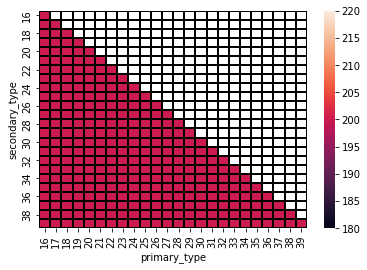

In [18]:
BinDF_low = binaryCreation(singles,snr_range='low',target=200,fluxSeparate=True)
spt_snr = BinDF_low.groupby('secondary_type').primary_type.value_counts().unstack()
sns.heatmap(spt_snr,annot=False,linewidths=0.1,linecolor='black')

Text(0.5, 1.0, 'SNR Distribution')

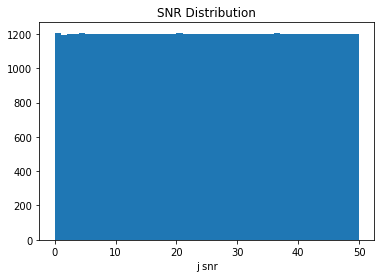

In [19]:
fig, axe = plt.subplots()
axe.hist(BinDF_low['J_SNR'],bins=50)
plt.xlabel('j snr')
plt.title('SNR Distribution')

Text(0.5, 1.0, 'SNR Distribution')

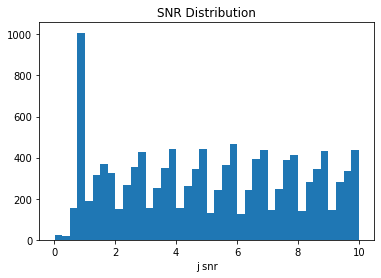

In [20]:
fig, axe = plt.subplots()
axe.hist(BinDF_low['J_SNR'][BinDF_low['J_SNR']<10],bins=40)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [21]:
with open('data/BinDF_low.pickle', 'wb') as f:
        pickle.dump(BinDF_low, f)

Multioutput Random Fores MID snr (50<snr<100)

51.0
0.0019989013671875
52.0
423.0511221885681
53.0
836.636819601059
54.0
1279.3816859722137
55.0
1719.5193758010864
56.0
2158.614317893982
57.0
2610.005739212036
58.0
3026.220103263855
59.0
3417.3713943958282
60.0
3804.0066347122192
61.0
4172.609965324402
62.0
4550.601920604706
63.0
4923.1638650894165
64.0
5296.932841062546
65.0
5680.455753087997
66.0
6046.105743646622
67.0
6411.535441875458
68.0
6762.051774263382
69.0
7111.1830151081085
70.0
7449.365532398224
71.0
7769.822302103043
72.0
8107.409000635147
73.0
8427.198472738266
74.0
8734.814267635345
75.0
9032.329177379608
76.0
9332.545395851135
77.0
9620.094766139984
78.0
9894.755799770355
79.0
10214.146388053894
80.0
10583.476957321167
81.0
10953.829529762268
82.0
11373.090938091278
83.0
11746.63347029686
84.0
12095.665589571
85.0
12484.38918876648
86.0
12864.065608501434
87.0
13290.1046936512
88.0
13723.397562503815
89.0
14200.79127573967
90.0
14662.31922340393
91.0
15075.798291921616
92.0
15485.183639526367
93.0
15897.702314138412

<AxesSubplot:xlabel='primary_type', ylabel='secondary_type'>

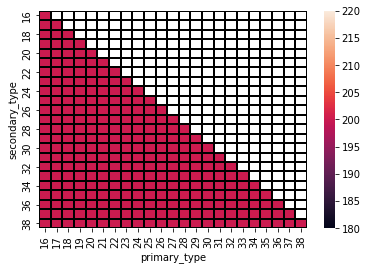

In [24]:
BinDF_mid = binaryCreation(singles,snr_range='mid',target=200,fluxSeparate=True)
spt_snr = BinDF_mid.groupby('secondary_type').primary_type.value_counts().unstack()
sns.heatmap(spt_snr,annot=False,linewidths=0.1,linecolor='black')

Text(0.5, 1.0, 'SNR Distribution')

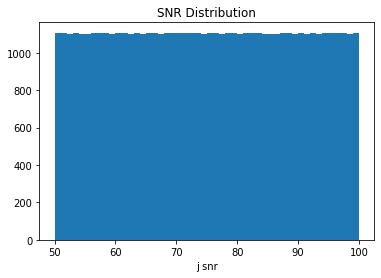

In [28]:
fig, axe = plt.subplots()
axe.hist(BinDF_mid['J_SNR'],bins=50)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [26]:
with open('data/BinDF_mid.pickle', 'wb') as f:
        pickle.dump(BinDF_mid, f)

Multioutput Random Forest HIG snr (>100)

16
0.001001596450805664
17
16.511357307434082
18
31.16011905670166
19
46.56421518325806
20
59.66078519821167
21
72.65508532524109
22
84.73012375831604
23
95.3090488910675
24
104.84339737892151
25
113.51428461074829
26
121.48468708992004
27
128.8445827960968
28
135.81871795654297
29
141.75771403312683
30
146.942147731781
31
151.51738739013672
32
155.23727011680603
33
158.1592617034912
34
158.1602611541748
35
161.0336995124817
36
162.5803782939911
37
163.39158987998962
38
163.39158987998962
39
163.39158987998962


<AxesSubplot:xlabel='primary_type', ylabel='secondary_type'>

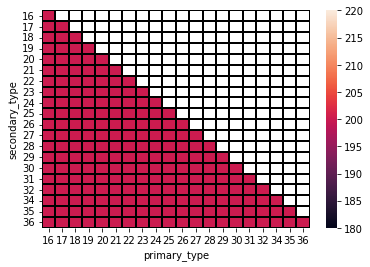

In [36]:
BinDF_hig = binaryCreation(singles,snr_range='hig',target=200,fluxSeparate=True)
spt_snr = BinDF_hig.groupby('secondary_type').primary_type.value_counts().unstack()
sns.heatmap(spt_snr,annot=False,linewidths=0.1,linecolor='black')

Text(0.5, 1.0, 'SNR Distribution')

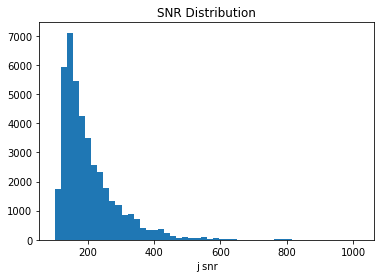

In [37]:
fig, axe = plt.subplots()
axe.hist(BinDF_hig['J_SNR'],bins=50)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [38]:
with open('data/BinDF_hig.pickle', 'wb') as f:
        pickle.dump(BinDF_hig, f)

Difference Spectrum

Low

1.0
0.008014202117919922
2.0
223.33922290802002
3.0
233.7629315853119
4.0
253.61047673225403
5.0
282.8007917404175
6.0
320.5019383430481
7.0
370.13105273246765
8.0
428.6671521663666
9.0
493.89909529685974
10.0
566.4958510398865
11.0
653.1506345272064
12.0
748.997709274292
13.0
859.3489739894867
14.0
971.6832661628723
15.0
1096.1244118213654
16.0
1227.4150297641754
17.0
1372.7703816890717
18.0
1524.011311531067
19.0
1681.4117028713226
20.0
1846.762389421463
21.0
2029.796412229538
22.0
2217.200852394104
23.0
2405.639169216156
24.0
2602.0887219905853
25.0
2808.7210381031036
26.0
3008.3931608200073
27.0
3223.5725173950195
28.0
3444.1854066848755
29.0
3664.9140903949738
30.0
3901.603523492813
31.0
4148.771577835083
32.0
4399.520061254501
33.0
4665.643943309784
34.0
4932.08495092392
35.0
5183.509025096893
36.0
5454.94033408165
37.0
5741.89927816391
38.0
6009.377033948898
39.0
6285.661921739578
40.0
6552.995316028595
41.0
6808.952165365219
42.0
7079.743933200836
43.0
7341.037621021271
44.0
76

<AxesSubplot:xlabel='primary_type', ylabel='secondary_type'>

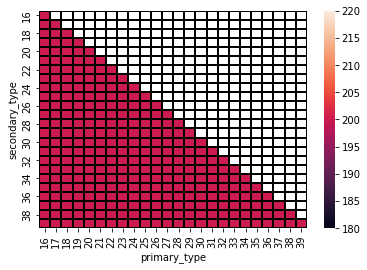

In [45]:
BinDF_low_d = binaryCreation(singles,snr_range='low',target=200,fluxSeparate=True,difference=True)
spt_snr = BinDF_low_d.groupby('secondary_type').primary_type.value_counts().unstack()
sns.heatmap(spt_snr,annot=False,linewidths=0.1,linecolor='black')

Text(0.5, 1.0, 'SNR Distribution')

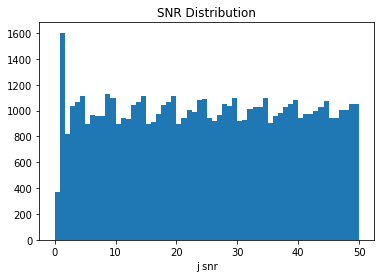

In [46]:
fig, axe = plt.subplots()
axe.hist(BinDF_low_d['J_SNR'],bins=60)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [47]:
with open('data/BinDF_low_d.pickle', 'wb') as f:
        pickle.dump(BinDF_low_d, f)

Difference Spectrum

Mid

51.0
0.1872873306274414
52.0
461.2447118759155
53.0
912.4826941490173
54.0
1345.3169102668762
55.0
1767.5455632209778
56.0
2208.3169026374817
57.0
2638.3772518634796
58.0
3051.062601327896
59.0
3458.3032381534576
60.0
3878.5396711826324
61.0
4259.790650367737
62.0
4624.579041481018
63.0
5013.681247711182
64.0
5423.071543931961
65.0
5834.636397123337
66.0
6211.919303894043
67.0
6585.5528955459595
68.0
6942.70885181427
69.0
7283.283593654633
70.0
7643.490723609924
71.0
7992.341493368149
72.0
8352.376457929611
73.0
8705.078796625137
74.0
9035.848724365234
75.0
9332.3193359375
76.0
9615.928934574127
77.0
9898.543409109116
78.0
10205.258278608322
79.0
10564.608926057816
80.0
10937.578063726425
81.0
11311.869394779205
82.0
11705.762126922607
83.0
12065.701480150223
84.0
12444.62645483017
85.0
12807.19772696495
86.0
13191.297555685043
87.0
13623.409988880157
88.0
14067.54813504219
89.0
14569.290208816528
90.0
15031.064818382263
91.0
15448.175145864487
92.0
15881.965237379074
93.0
16274.021415

<AxesSubplot:xlabel='primary_type', ylabel='secondary_type'>

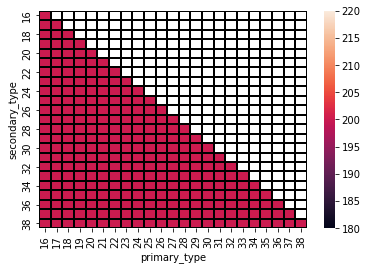

In [42]:
BinDF_mid_d = binaryCreation(singles,snr_range='mid',target=200,fluxSeparate=True,difference=True)
spt_snr = BinDF_mid_d.groupby('secondary_type').primary_type.value_counts().unstack()
sns.heatmap(spt_snr,annot=False,linewidths=0.1,linecolor='black')

Text(0.5, 1.0, 'SNR Distribution')

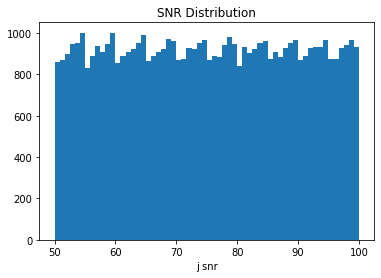

In [43]:
fig, axe = plt.subplots()
axe.hist(BinDF_mid_d['J_SNR'],bins=60)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [44]:
with open('data/BinDF_mid_d.pickle', 'wb') as f:
        pickle.dump(BinDF_mid_d, f)

Difference Spectrum

Hig

16
0.01601386070251465
17
15.855598449707031
18
30.26297426223755
19
44.494699478149414
20
58.36007475852966
21
70.3734998703003
22
82.09048509597778
23
92.43936848640442
24
101.82129240036011
25
110.44726538658142
26
118.29020714759827
27
125.51347208023071
28
131.9761106967926
29
137.70664644241333
30
142.64401841163635
31
146.87984490394592
32
150.3988537788391
33
153.24893283843994
34
153.24893283843994
35
155.38925004005432
36
156.79301643371582
37
157.49310946464539
38
157.49310946464539
39
157.49310946464539


<AxesSubplot:xlabel='primary_type', ylabel='secondary_type'>

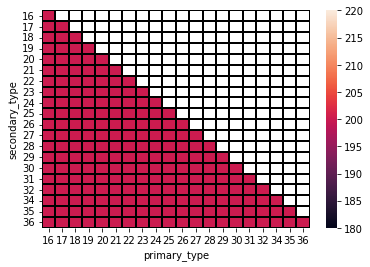

In [39]:
BinDF_hig_d = binaryCreation2(singles,snr_range='hig',target=200,fluxSeparate=True,difference=True)
spt_snr = BinDF_hig_d.groupby('secondary_type').primary_type.value_counts().unstack()
sns.heatmap(spt_snr,annot=False,linewidths=0.1,linecolor='black')

Text(0.5, 1.0, 'SNR Distribution')

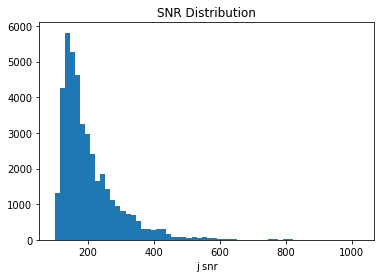

In [40]:
fig, axe = plt.subplots()
axe.hist(BinDF_hig_d['J_SNR'],bins=60)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [41]:
with open('data/BinDF_hig_d.pickle', 'wb') as f:
        pickle.dump(BinDF_hig_d, f)